# Measurement 5a - ASD on panel, SR3500 cosine diffuser

In [1]:
import time
start_time = time.time()
import datetime

import sys, os, shutil
sys.path.append("..")

from SRC import LoadSR3500Data

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
calfile = '/g/data/up71/projects/CalVal_Phase2/FLAME/CALIBRATION/RadCalCoeff_GT08_.csv'


In [3]:
allSR3500data = LoadSR3500Data.load_from_dir('/g/data/up71/projects/CalVal_Phase2/SR3500/21JAN21/RAW_DATA/SR3500/M5/Part1/', calfile)

In [4]:
allSR3500data.Wavelength = allSR3500data.Wavelength.astype(int)

In [5]:
allSR3500data.Rad_Target = allSR3500data.Rad_Target/np.pi

In [6]:
#allSR3500data.date_saved = allSR3500data.date_saved - datetime.timedelta(seconds=3600)

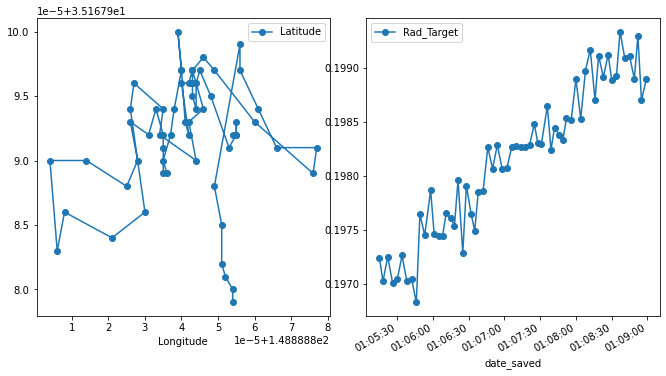

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9.5, 5.5))
plt.tight_layout(pad=1.5, w_pad=0.5, h_pad=0.5)

allSR3500data[allSR3500data.index==550].plot('Longitude', 'Latitude', style='-o', ax=axes[0])
allSR3500data[allSR3500data.index==550].plot('date_saved', 'Rad_Target', style='-o', ax=axes[1])

In [8]:
from SRC import LoadASDData

In [9]:
suffix = '.asd.rad.txt'
firstGoodLine = 1
Corners = [0,0,0,0,0,0]
allASDdata = LoadASDData.load_from_dir('/g/data/up71/projects/CalVal_Phase2/SR3500/21JAN21/RAW_DATA/ASD/M5/panel/', suffix, firstGoodLine, Corners)

In [10]:
allASDdata.date_saved = allASDdata.date_saved - datetime.timedelta(seconds=252)

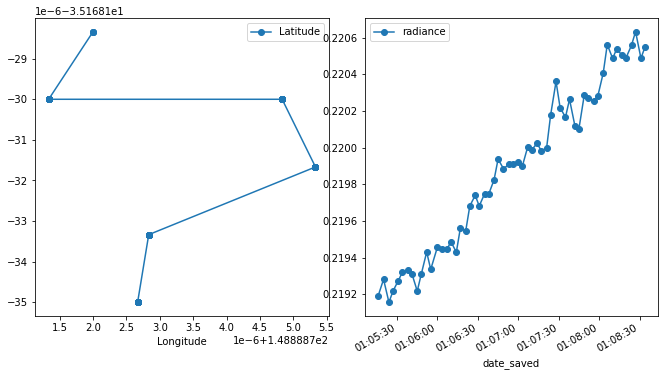

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9.5, 5.5))
plt.tight_layout(pad=1.5, w_pad=0.5, h_pad=0.5)

allASDdata[allASDdata.index==550].plot('Longitude', 'Latitude', style='-o', ax=axes[0])
allASDdata[allASDdata.index==550].plot('date_saved', 'radiance', style='-o', ax=axes[1])

In [12]:
allSR3500data['Line'] = 1

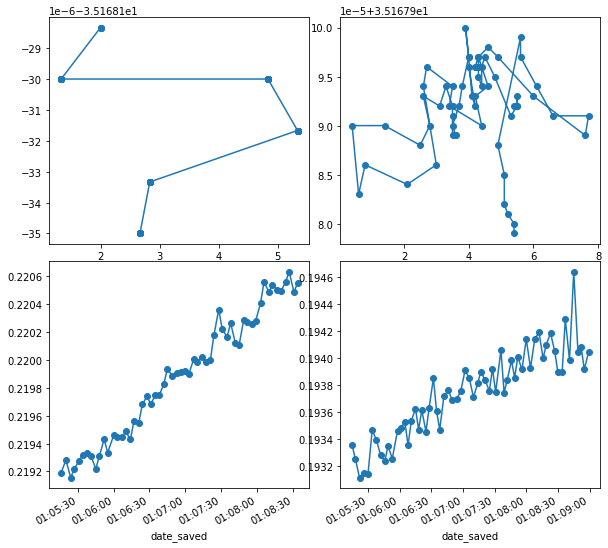

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8.5, 8.5))
plt.tight_layout(pad=1.5, w_pad=0.0, h_pad=0.0)
allASDdata[allASDdata.index==550].plot('Longitude', 'Latitude', style='-o', ax=axes[0,0], legend=False)
allASDdata[allASDdata.index==550].plot('date_saved', 'radiance', style='-o', ax=axes[1,0], legend=False)
allSR3500data[allSR3500data.Wavelength==1000].plot('Longitude', 'Latitude', style='-o', ax=axes[0,1], legend=False)
allSR3500data[allSR3500data.Wavelength==1000].plot('date_saved', 'Rad_Target', style='-o', ax=axes[1,1], legend=False)

In [14]:
from SRC import MakeSpecDF

In [15]:
#allSR3500Ground.rename(columns={'Rad_Target':'radiance'}, inplace = True)
allSR3500data.rename(columns={'Rad_Target':'radiance'}, inplace = True)

In [16]:
#allASDground.reset_index(inplace=True)
#allASDGroundSpec = MakeSpecDF.make_spec_df(allASDGround)
#allSR3500GroundSpec = MakeSpecDF.make_spec_df(allSR3500Ground)

allASDSpec = MakeSpecDF.make_spec_df(allASDdata)
allSR3500Spec = MakeSpecDF.make_spec_df(allSR3500data)
allASDSpec.rename(columns={'radiance': 'radiance1-0'}, inplace=True)

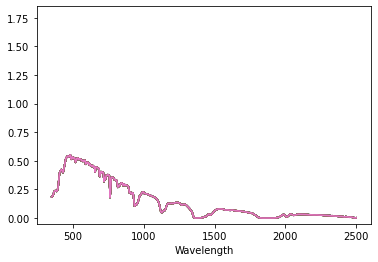

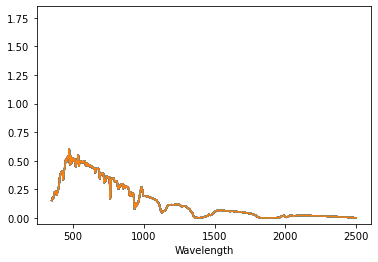

In [17]:
allASDSpec.plot(legend=False, ylim=(-0.05, 1.85))
allSR3500Spec.plot(legend=False, ylim=(-0.05, 1.85))

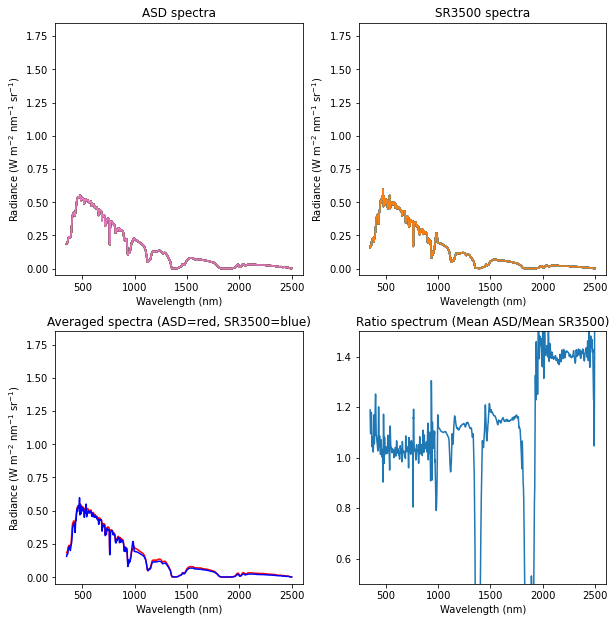

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8.5, 8.5))
plt.tight_layout(pad=1.5, w_pad=2.5, h_pad=3.5)
allASDSpec.mean(axis=1).plot(ax=axes[1,0], color='r')
allSR3500Spec.mean(axis=1).plot(ax=axes[1,0], color='b')
allASDSpec.plot(ax=axes[0,0], legend=False)
allSR3500Spec.plot(ax=axes[0,1], legend=False)
(allASDSpec.mean(axis=1)/allSR3500Spec.mean(axis=1)).plot(ax=axes[1,1])

axes[0,0].set_title('ASD spectra')
axes[0,1].set_title('SR3500 spectra')
axes[1,0].set_title('Averaged spectra (ASD=red, SR3500=blue)')
axes[1,1].set_title('Ratio spectrum (Mean ASD/Mean SR3500)')

axes[0,0].set_ylim(-0.05, 1.85)
axes[0,1].set_ylim(-0.05, 1.85)
axes[1,0].set_ylim(-0.05, 1.85)
axes[1,1].set_ylim(0.5, 1.5)

for i in range(2):
    for j in range(2):
        axes[i,j].set_xlabel('Wavelength (nm)')
        if i+j!=2:
            axes[i,j].set_ylabel('Radiance (W m$^{-2}$ nm$^{-1}$ sr$^{-1}$)')

plt.savefig('FIG_Spectra_21JAN21_M5a.png')

In [19]:
def MakeMeanSpec(allASDdata, allASDSpec, startWavelength, endWavelength):
        dftemp = pd.DataFrame([allASDdata.date_saved.unique(), allASDSpec[np.logical_and(allASDSpec.index >startWavelength, allASDSpec.index < endWavelength)].mean(axis=0)]).T
        dftemp.columns = ['date_saved', 'rad_mean']
        return dftemp

In [20]:
allASDmean = MakeMeanSpec(allASDdata, allASDSpec, 450, 700)
allSR3500mean = MakeMeanSpec(allSR3500data, allSR3500Spec, 450, 700)

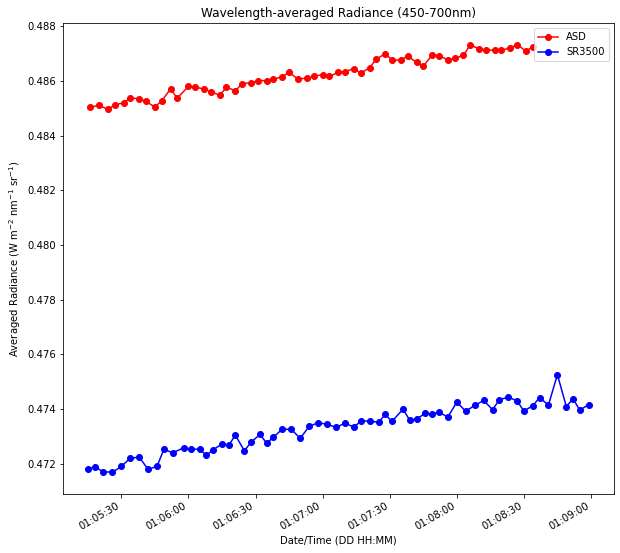

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8.5, 8.5))
plt.tight_layout(pad=1.5, w_pad=0.0, h_pad=0.0)
allASDmean.plot('date_saved', 'rad_mean', ax=axes, style = '-o', color='r', legend=False)
allSR3500mean.plot('date_saved', 'rad_mean', ax=axes, style = '-o', color='b', legend=False)
axes.set_ylabel('Averaged Radiance (W m$^{-2}$ nm$^{-1}$ sr$^{-1}$)')
axes.legend(['ASD', 'SR3500'])
axes.set_title('Wavelength-averaged Radiance (450-700nm)')
axes.set_xlabel('Date/Time (DD HH:MM)')

plt.savefig('Measurement5a.png')

In [22]:
allASDdata.date_saved.min() - allSR3500data.date_saved.min()

Timedelta('0 days 00:00:01')